# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010, corresponding to a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit application, with good interest rates, was offered. For each contact, a large number of attributes was stored and if there was a success (the target variable). There were 6499 successes (8% success rate).

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import numpy as np
import time

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
print(df.isnull().sum())
print(df.info())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   mon

 Perform statistical tests to determine the association between each categorical feature and the target variable. I haved used the Chi-squared test to assess the independence between a categorical feature and the target variable. A low p-value from the Chi-squared test suggests that the categorical feature and the target variable are dependent, which could make the feature useful for your model.

In [5]:
from scipy.stats import chi2_contingency
df=df.convert_dtypes()
categorical_features = list(df.select_dtypes(include=['string']).columns)

print("Categorical features:", categorical_features)


rel_feature_list = []
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['y'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    rel_feature_list += [feature] if p >= 0.05 else []
    print(f"{feature} - p-value: {p}")
print("Selected Categorical features:", rel_feature_list)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
job - p-value: 4.189763287563623e-199
marital - p-value: 2.068014648442211e-26
education - p-value: 3.3051890144025054e-38
default - p-value: 5.161957951391637e-89
housing - p-value: 0.05829447669453452
loan - p-value: 0.5786752870441754
contact - p-value: 1.525985652312996e-189
month - p-value: 0.0
day_of_week - p-value: 2.958482005278532e-05
poutcome - p-value: 0.0
y - p-value: 0.0
Selected Categorical features: ['housing', 'loan']


Based on data we will drop features: ['housing', 'loan'] that has no relevnes due to soce grter than 0.05

In [6]:
df.drop(rel_feature_list, axis=1, inplace=True)

In [7]:
categorical_features = list(df.columns)
print("Categorical features:", categorical_features)
# for feature in categorical_features:
#     plt.figure(figsize=(10, 5))
#     sns.countplot(data=df, x=feature, hue='y')
#     plt.title(f'{feature} vs Target= Yes/No')
#     plt.show()
#     print("Selected feature name:", feature)

Categorical features: ['age', 'job', 'marital', 'education', 'default', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


Based on the visualization of relationships between each feature and the target variable, the plots reveal that the following columns may not have a significant effect on the machine learning model:
day_of_week and pdays,

we will drop them to increase processing te performance




In [8]:
df.drop(['pdays','day_of_week'], axis=1, inplace=True)


In [9]:
categorical_features = list(df.select_dtypes(include=['string']).columns)
print("Categorical features:", categorical_features)


Categorical features: ['job', 'marital', 'education', 'default', 'contact', 'month', 'poutcome', 'y']


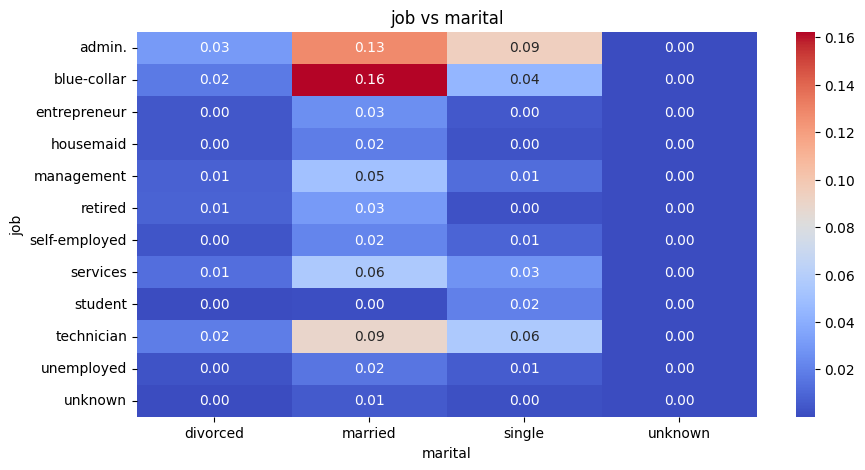

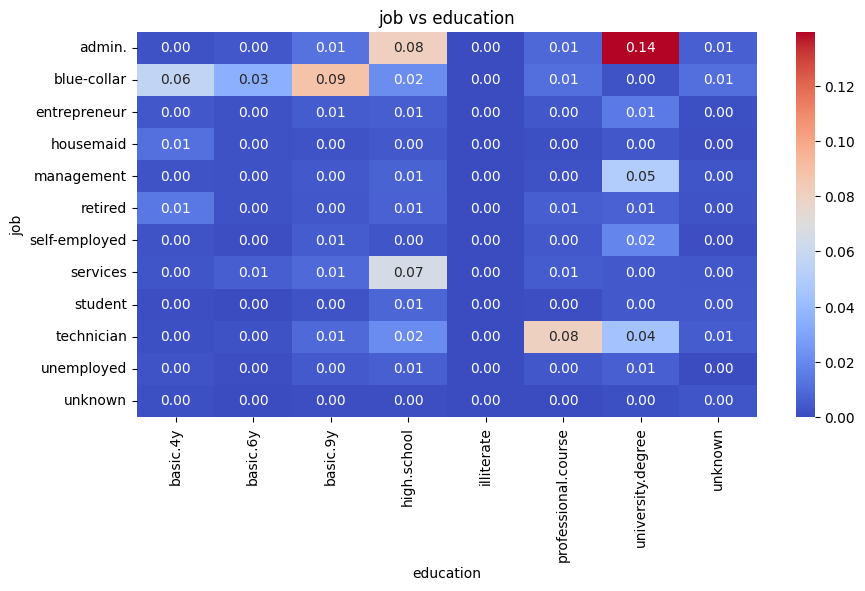

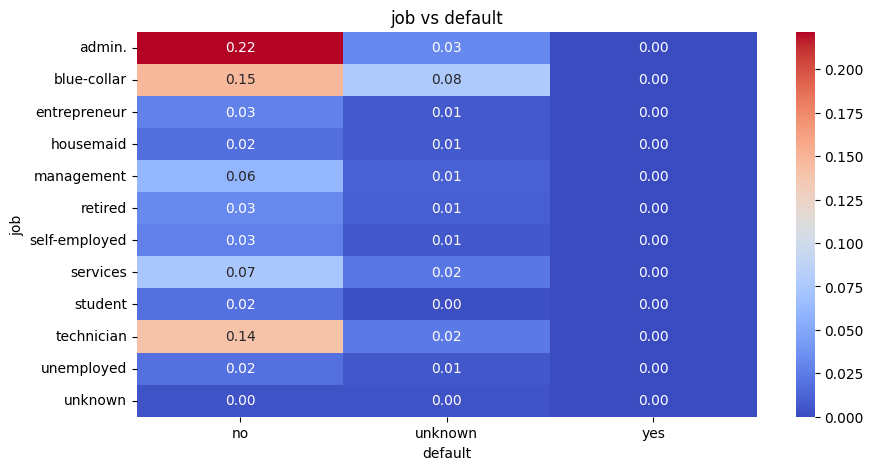

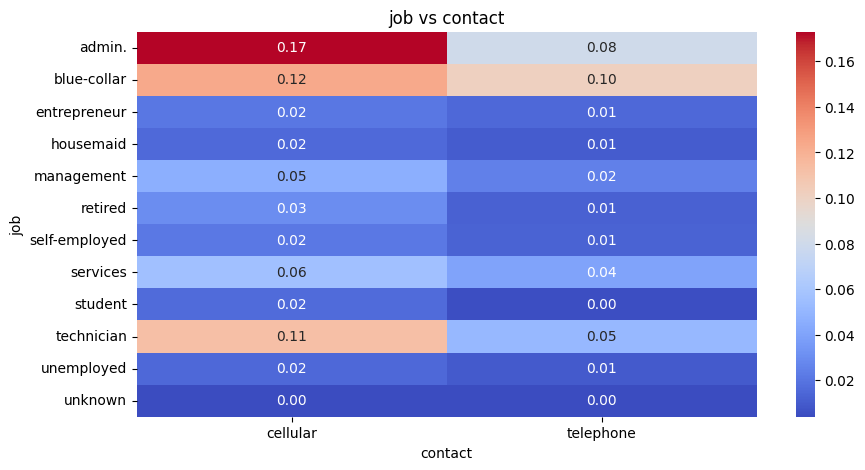

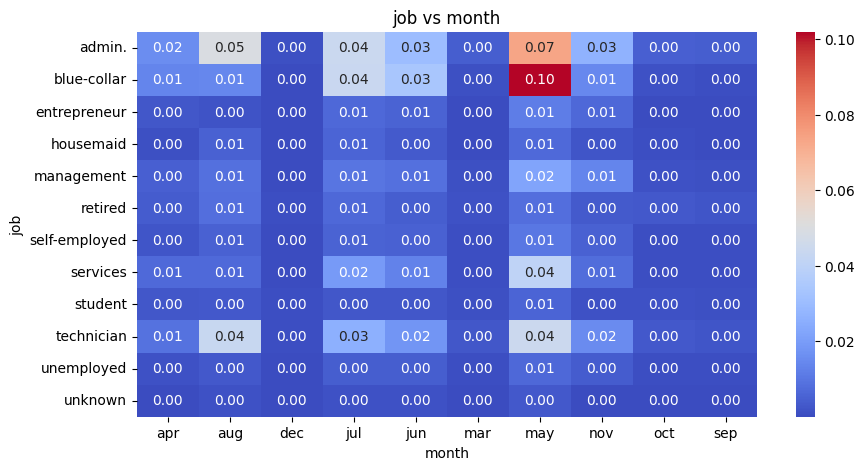

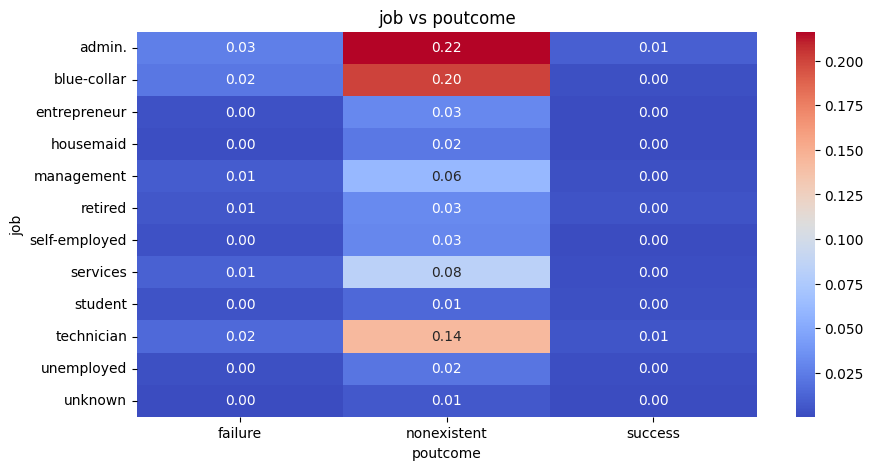

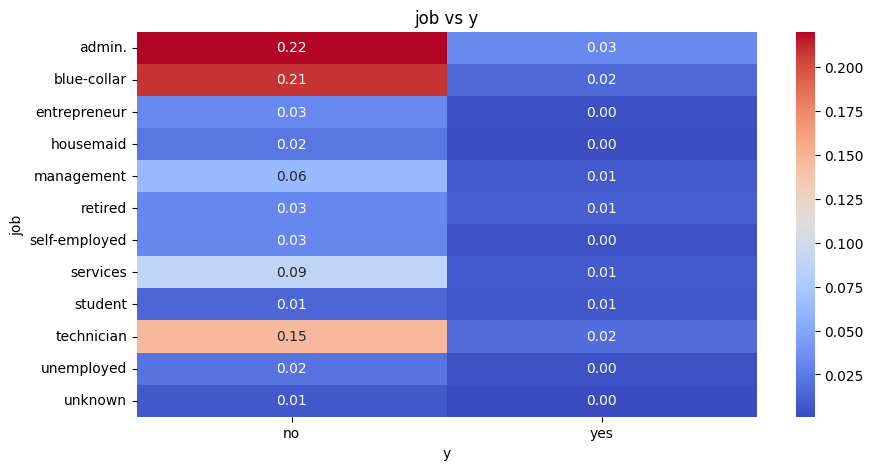

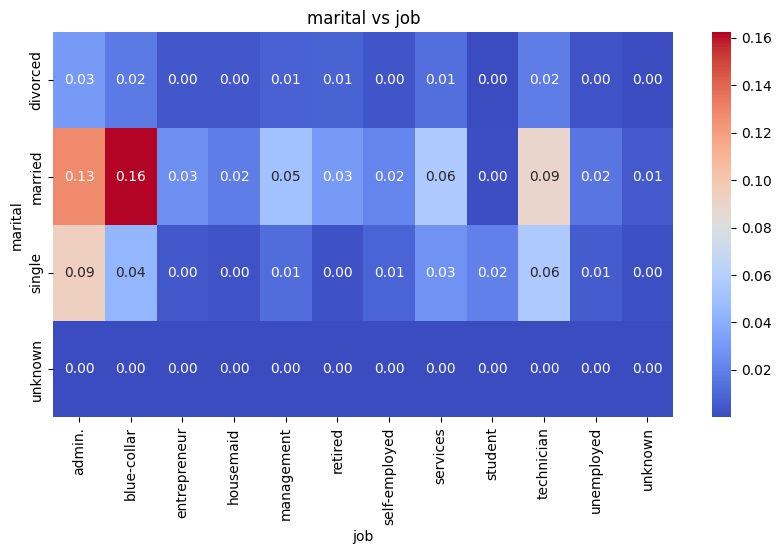

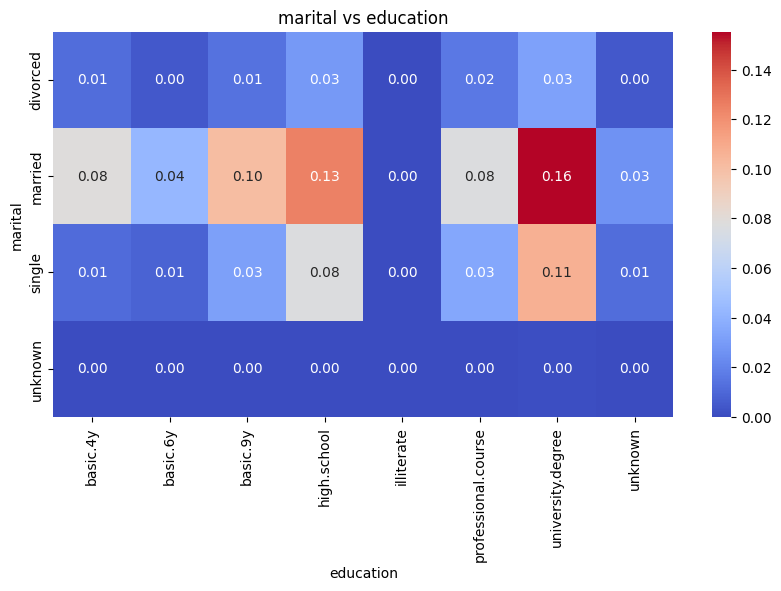

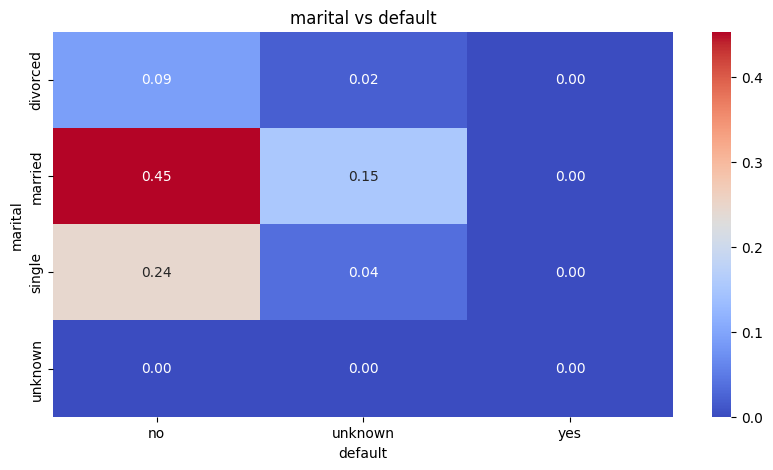

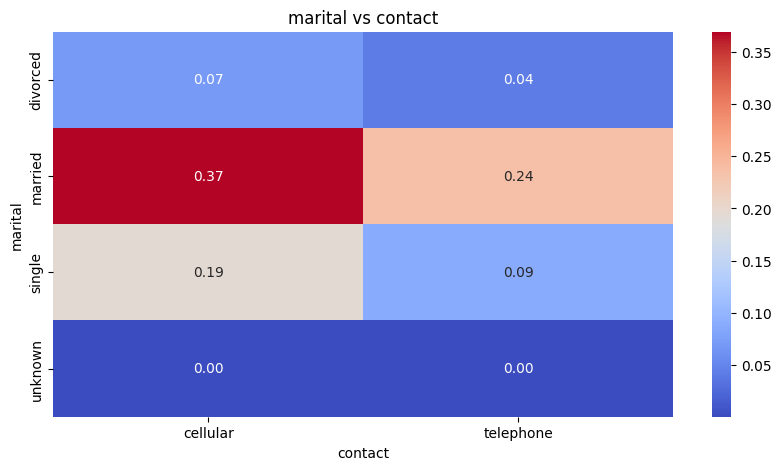

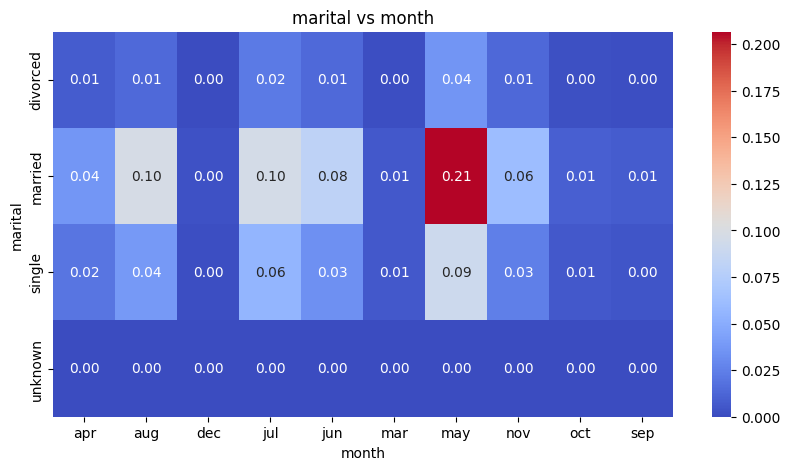

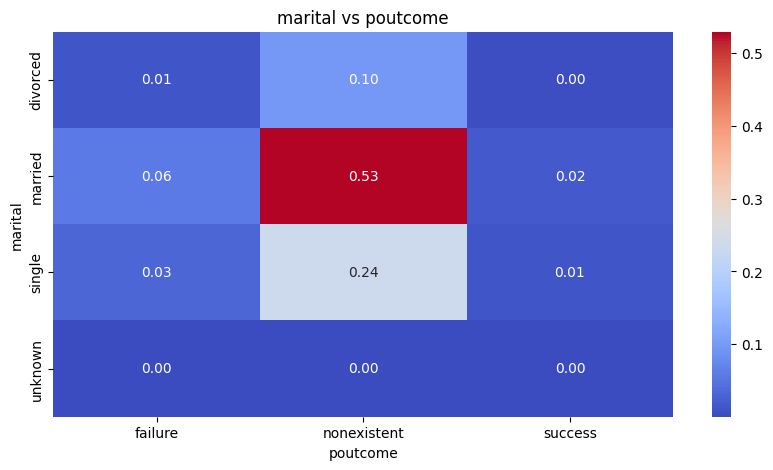

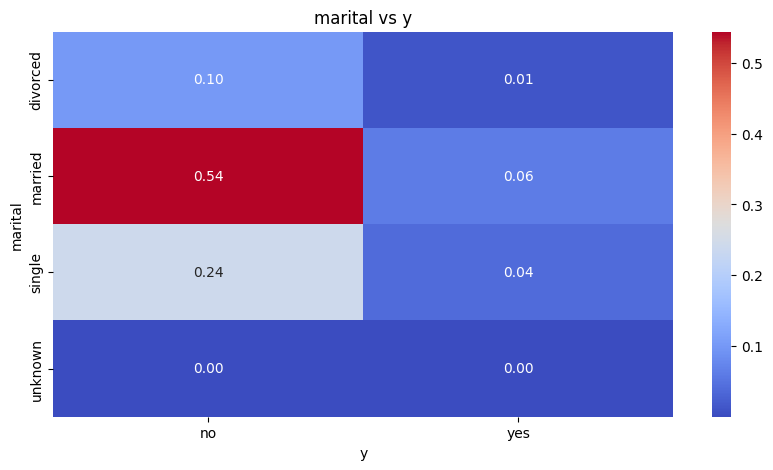

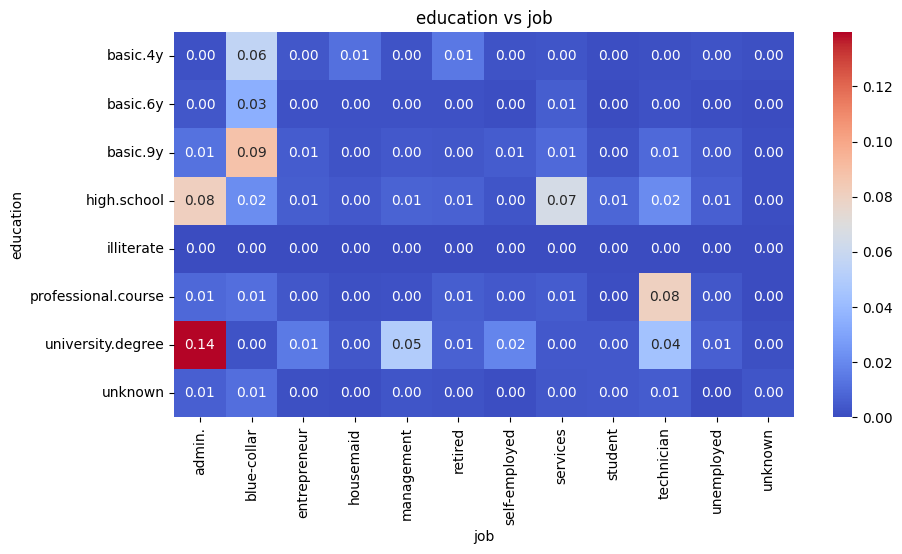

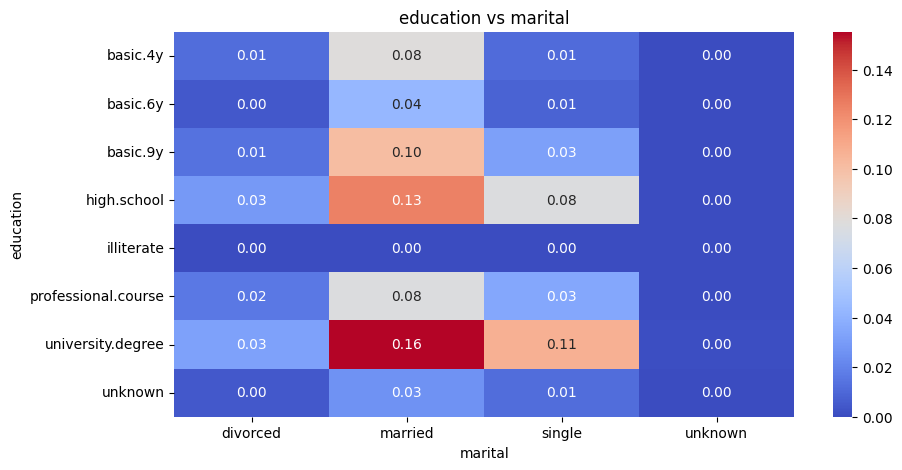

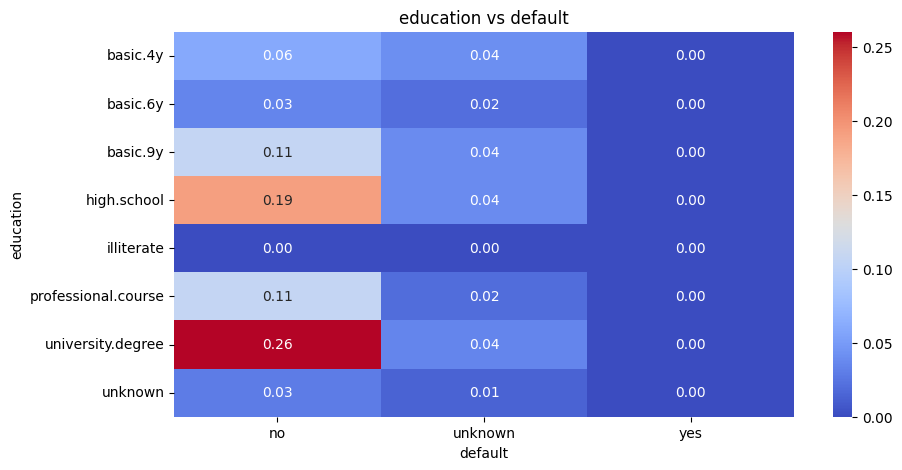

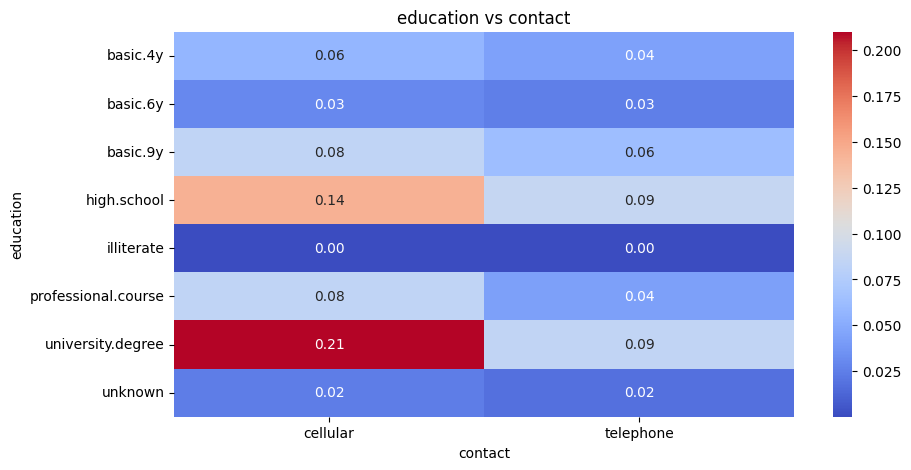

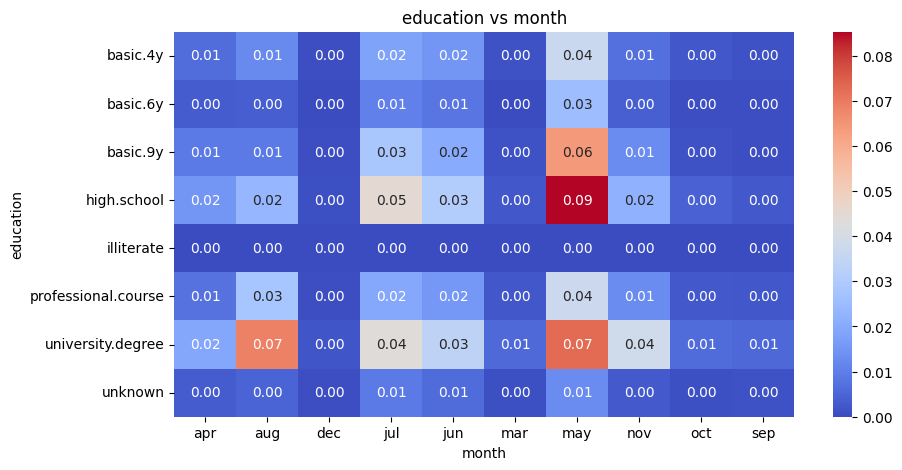

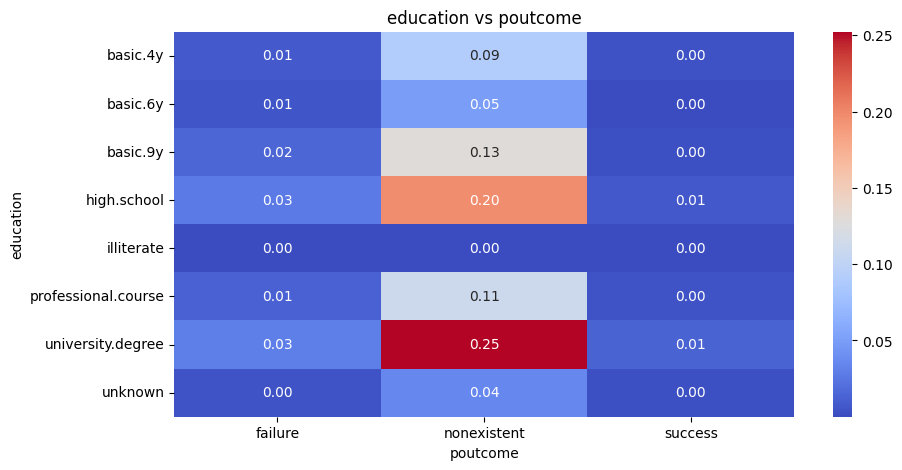

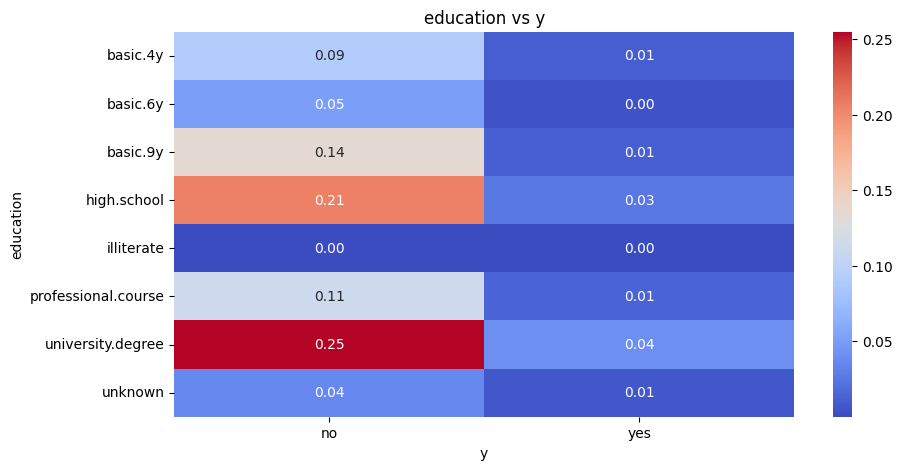

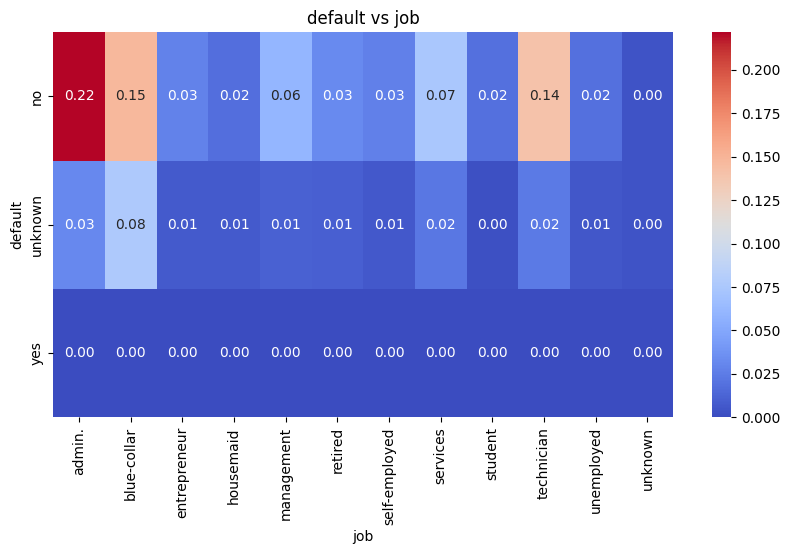

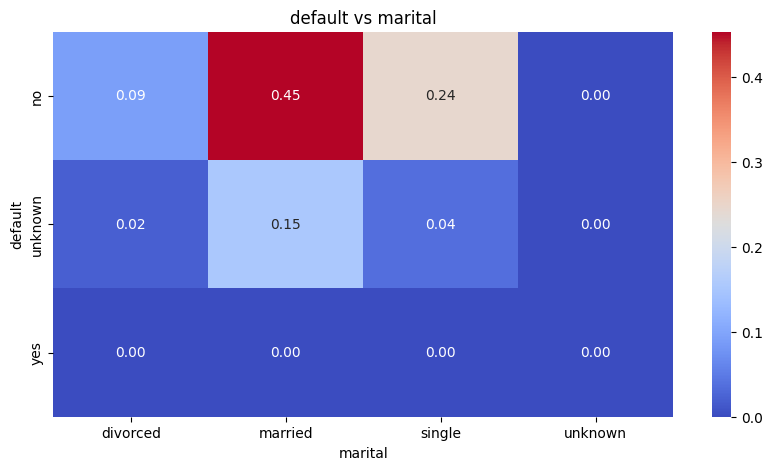

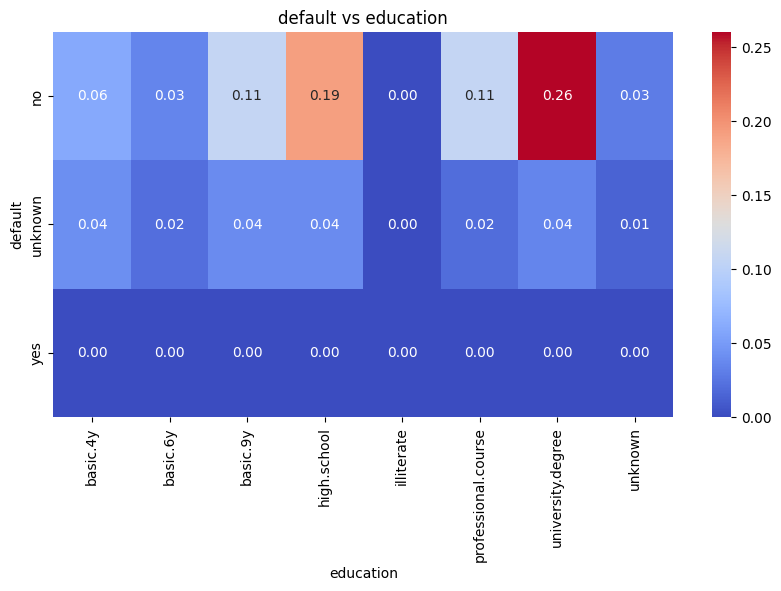

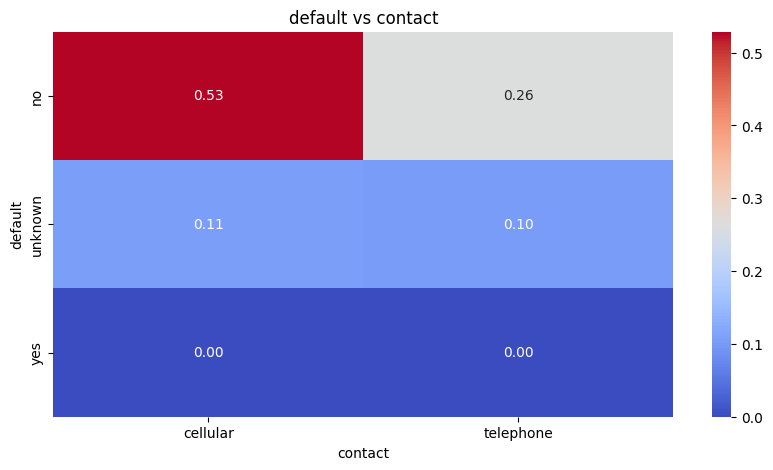

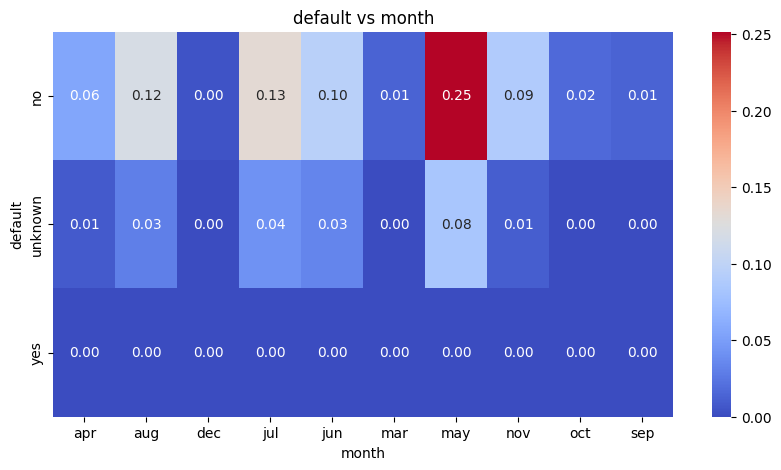

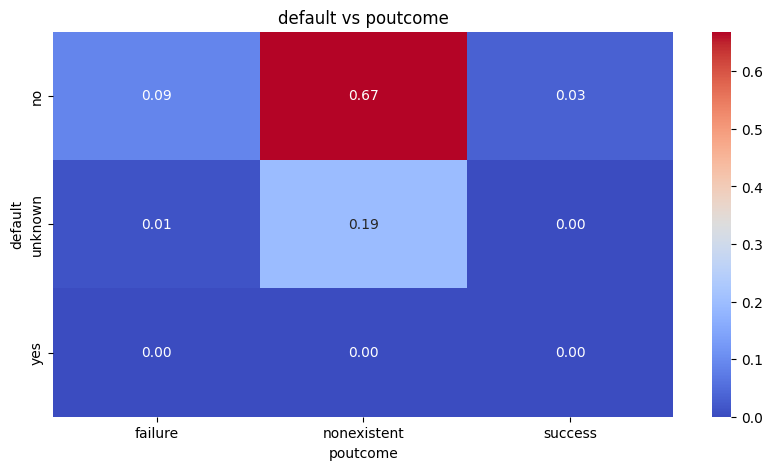

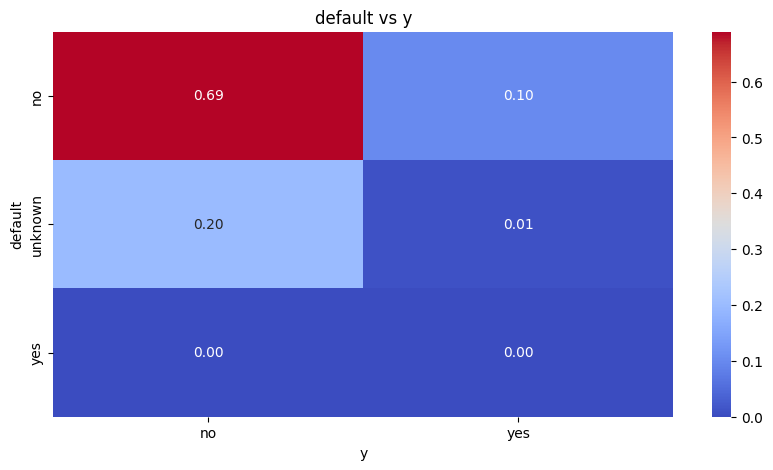

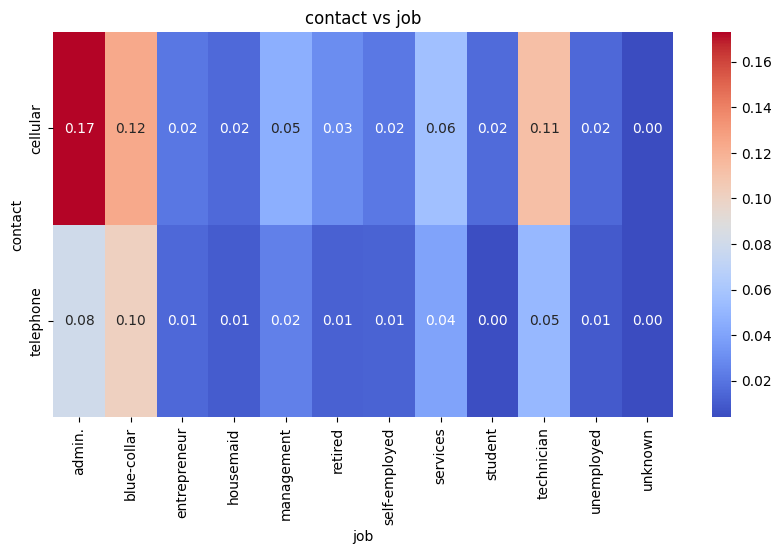

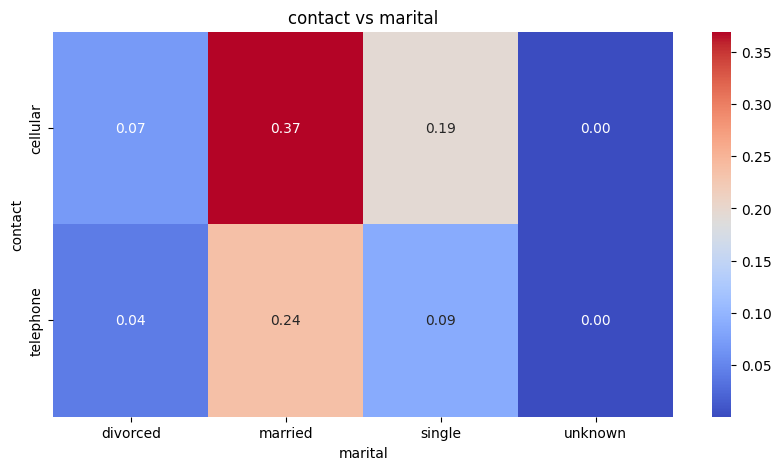

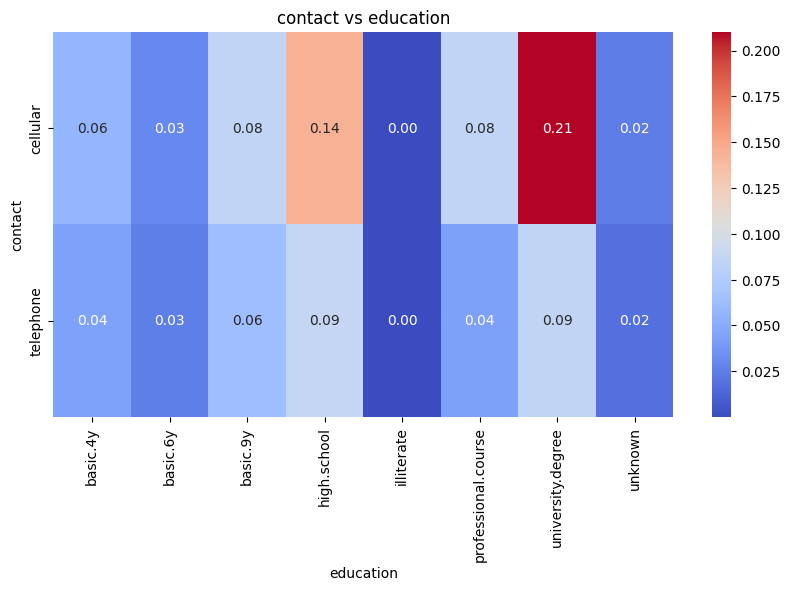

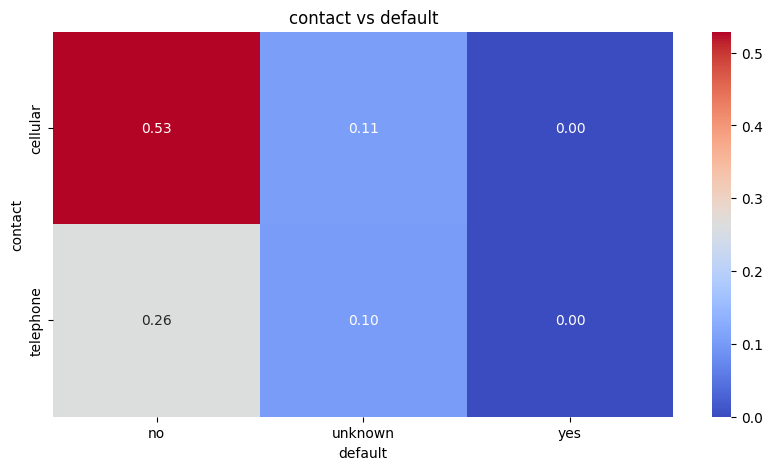

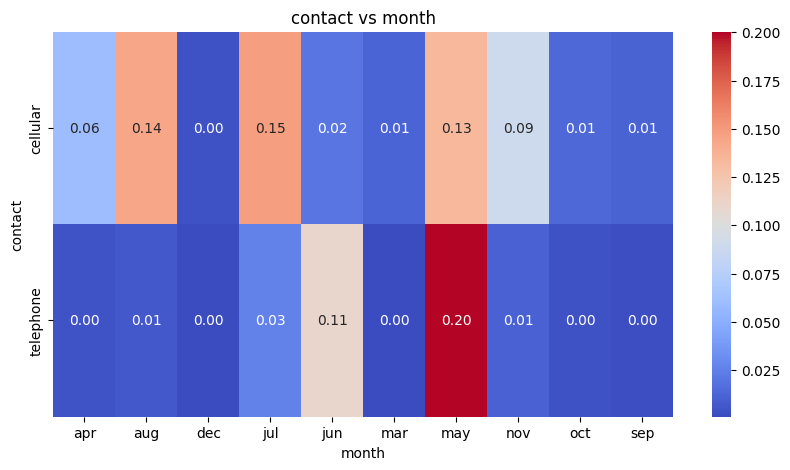

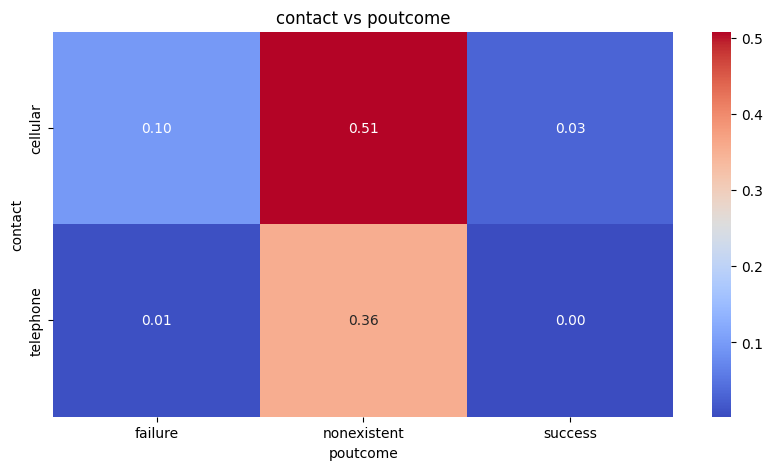

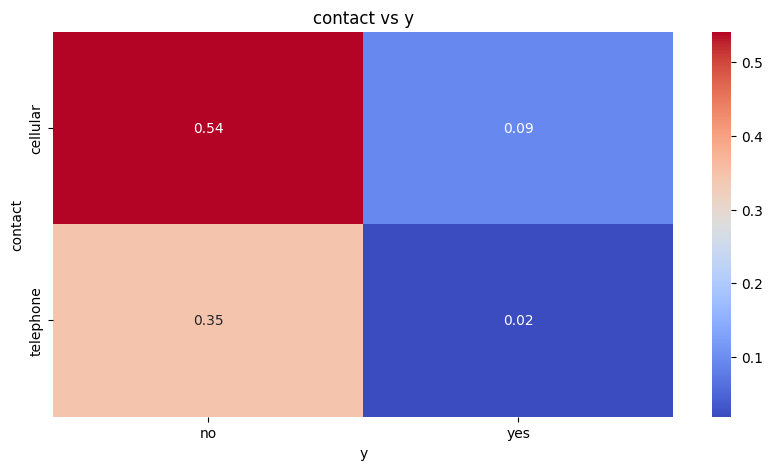

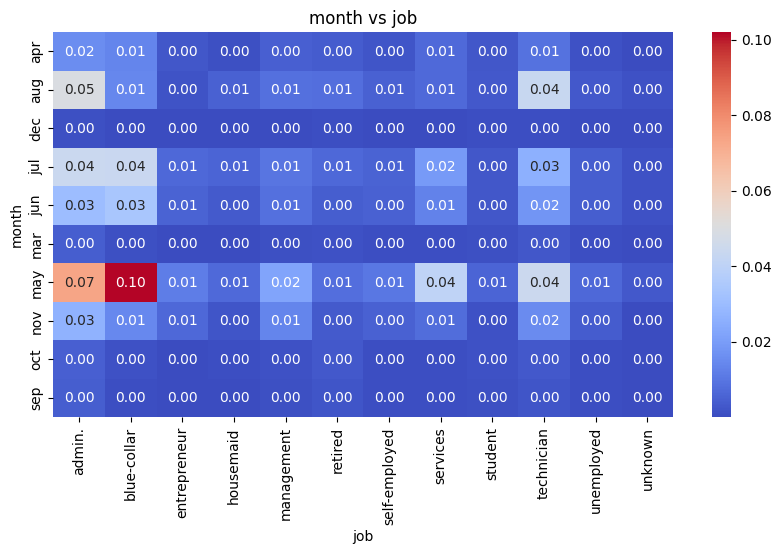

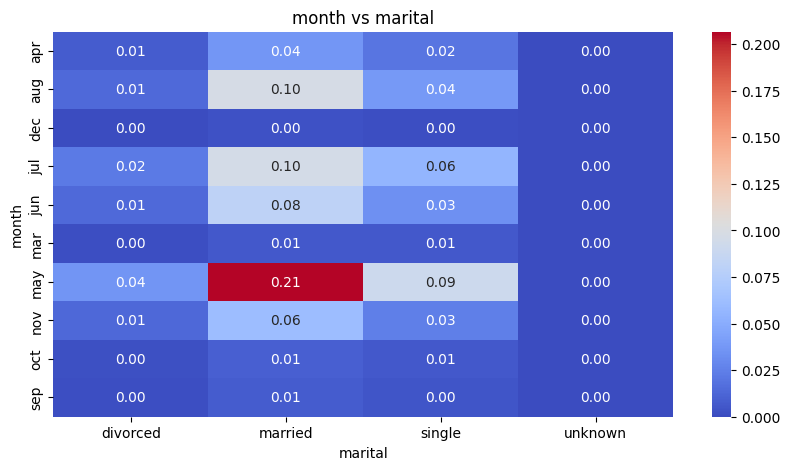

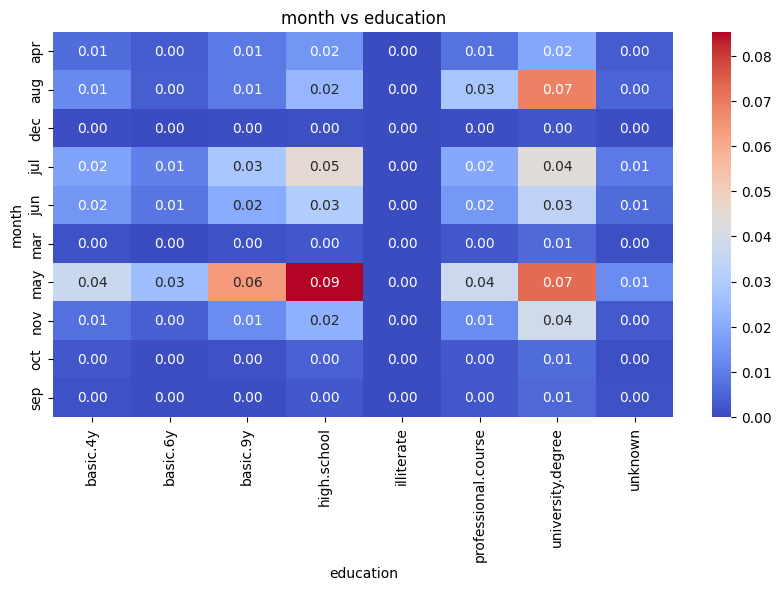

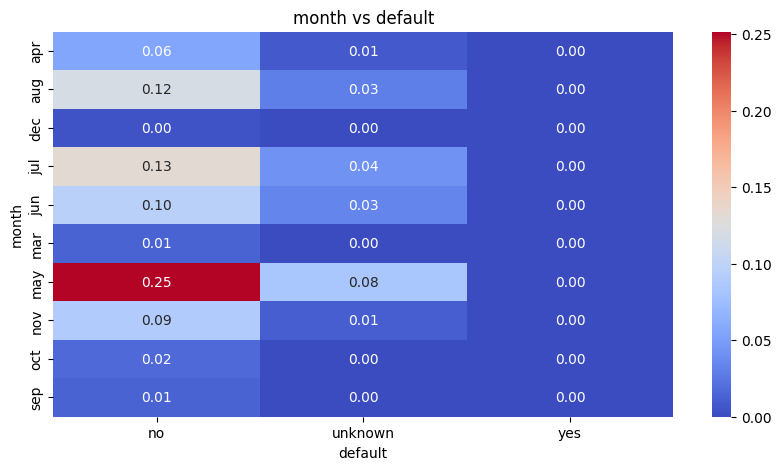

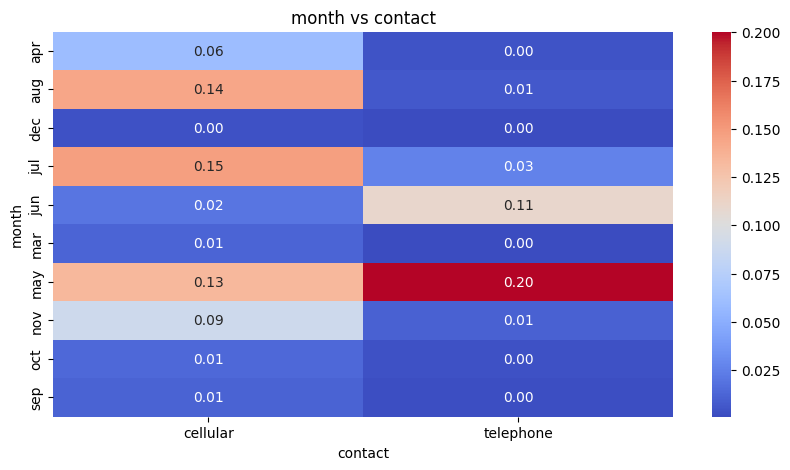

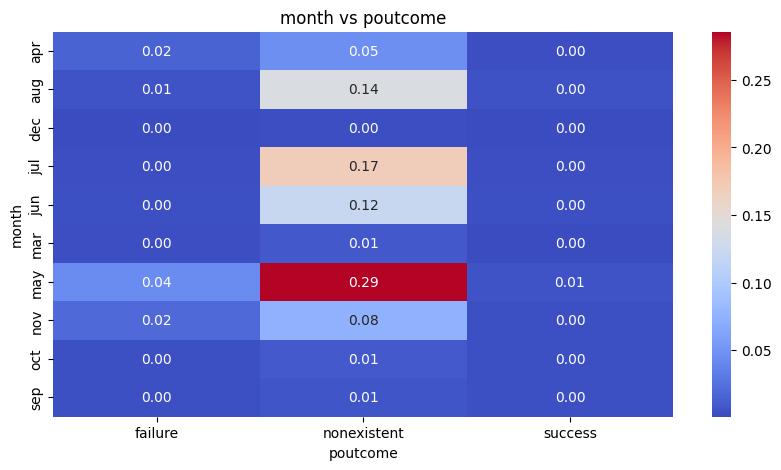

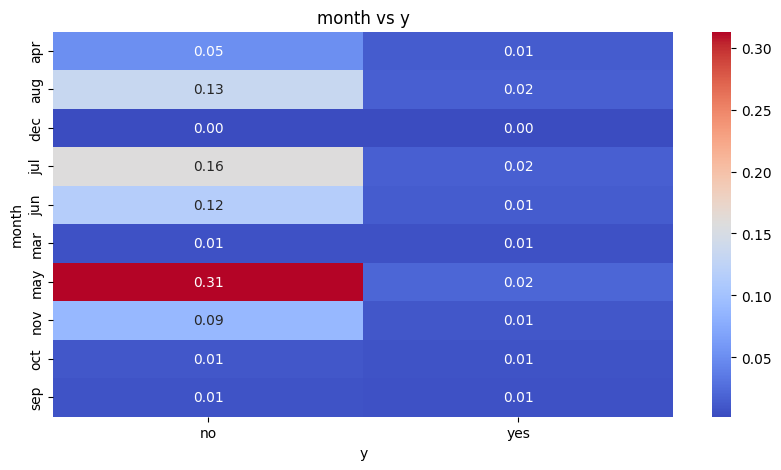

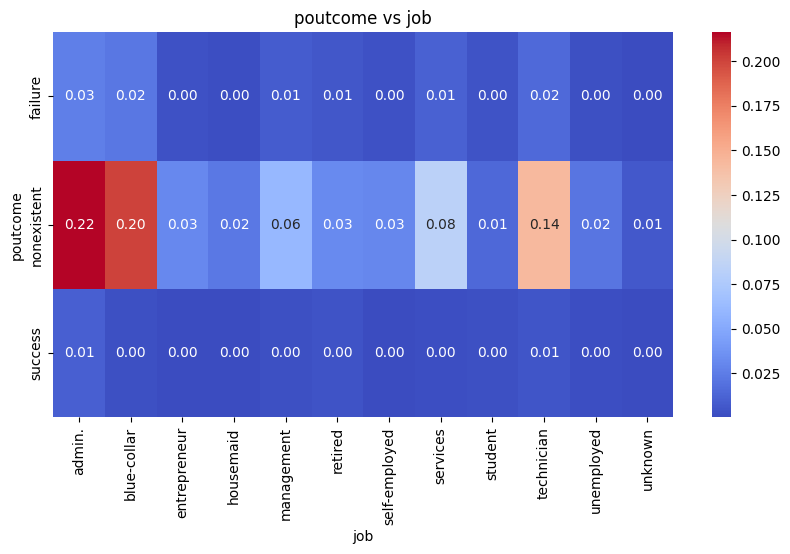

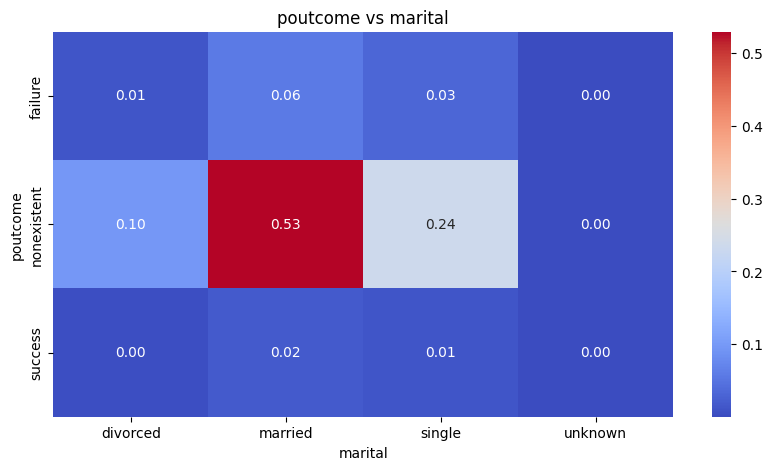

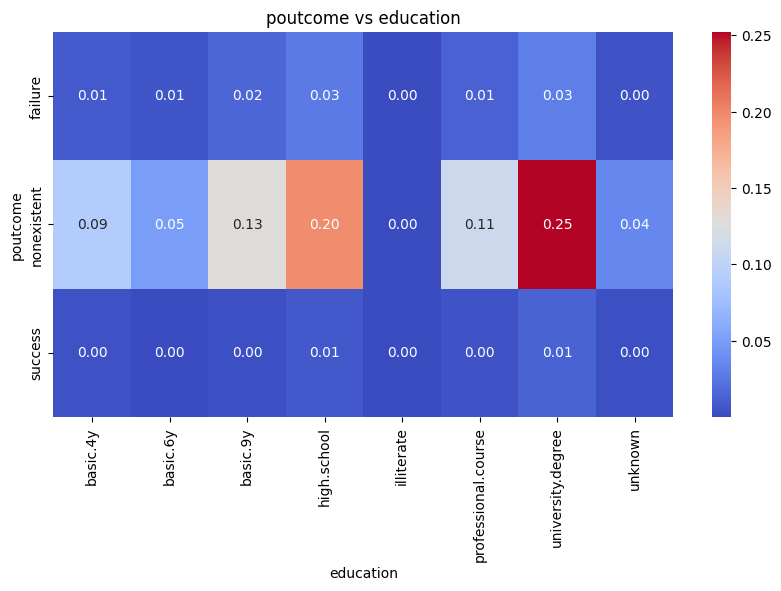

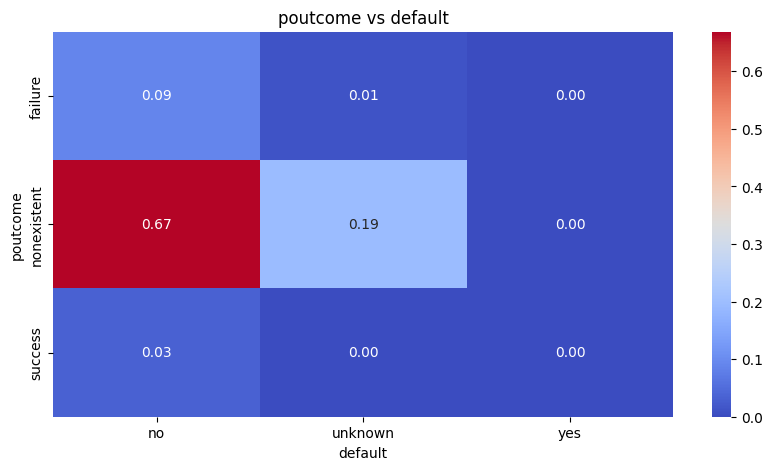

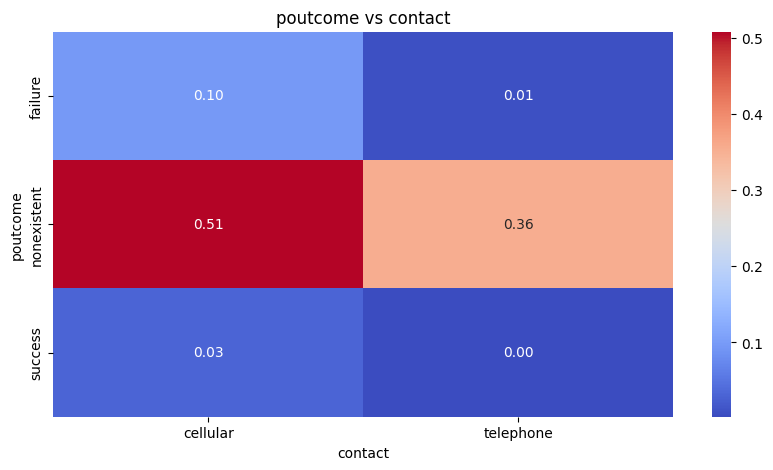

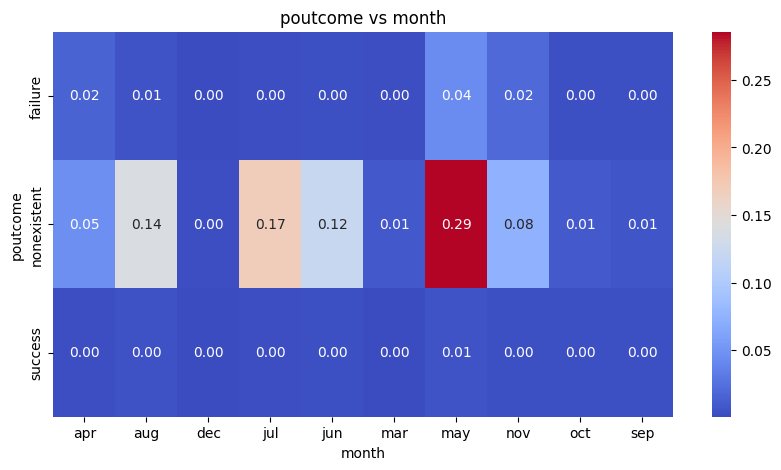

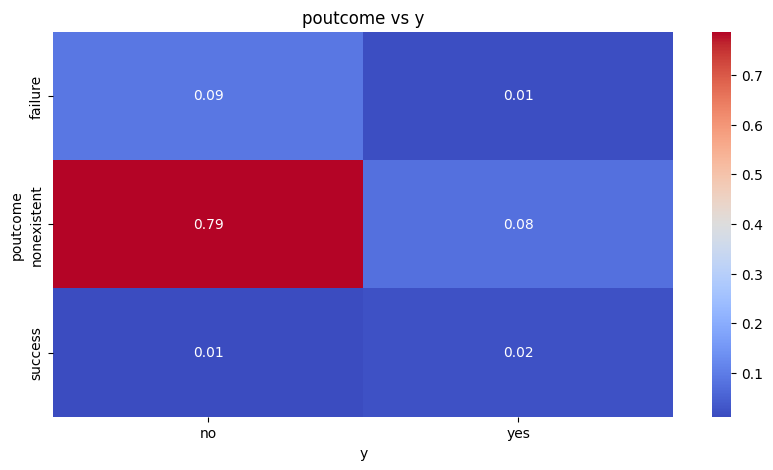

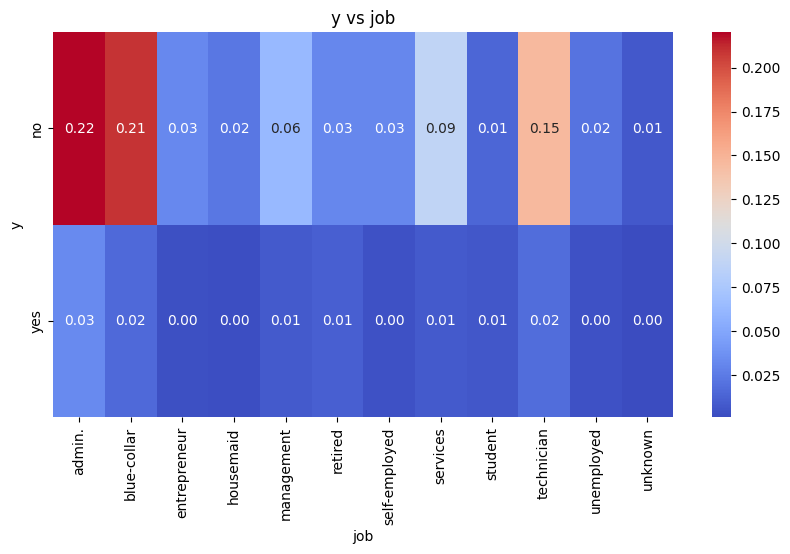

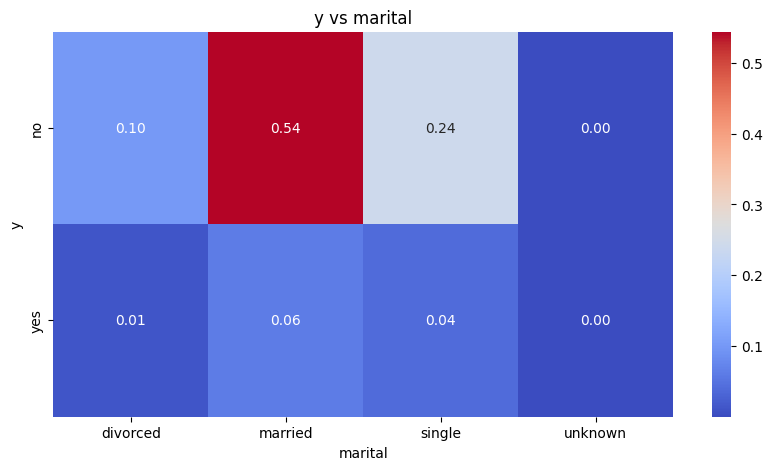

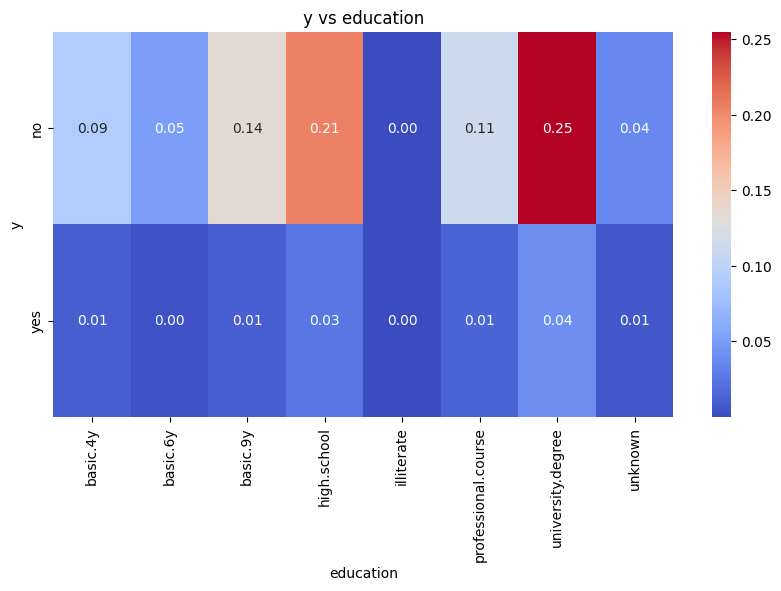

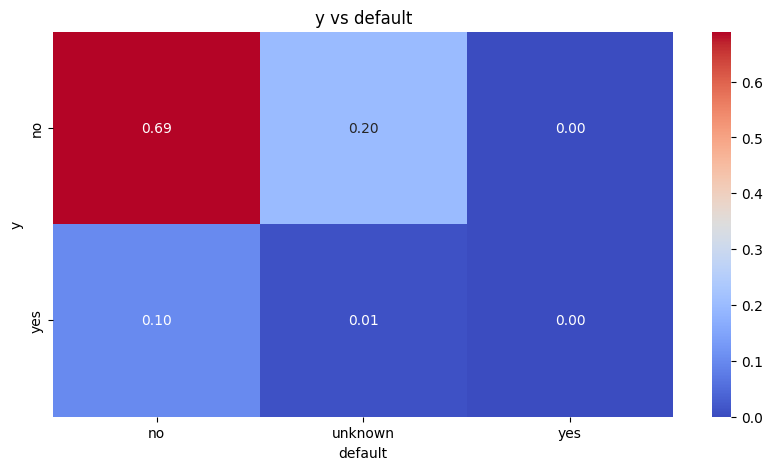

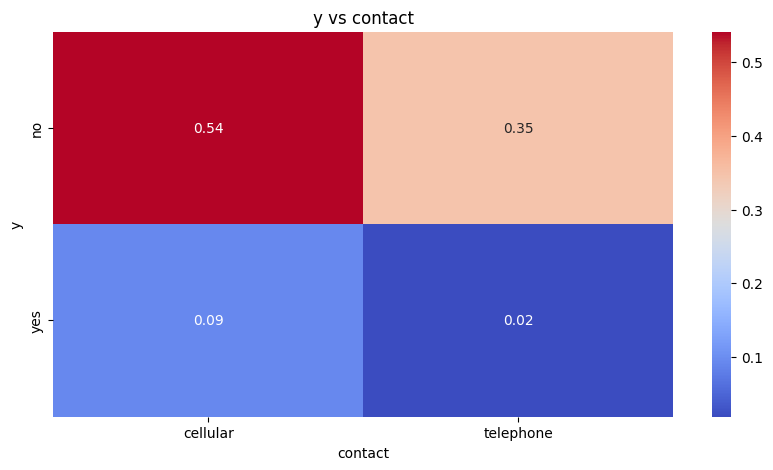

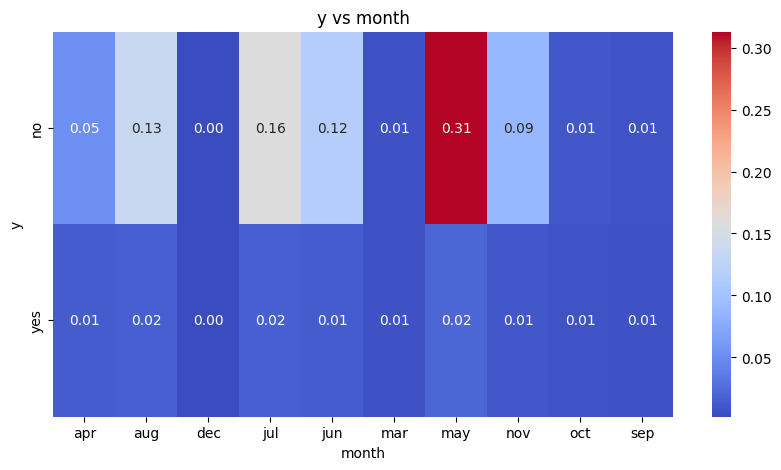

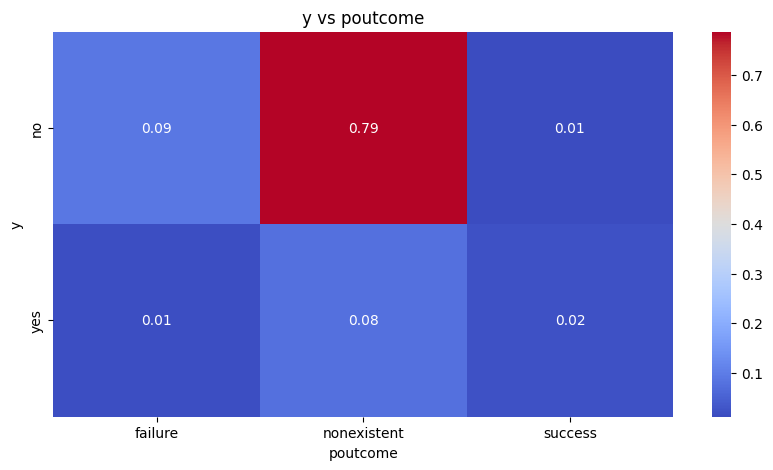

In [10]:
for feature_1 in categorical_features:
    for feature_2 in categorical_features:
        if feature_1 != feature_2:
            # Create a crosstab of the two categorical features
            crosstab = pd.crosstab(df[feature_1], df[feature_2])

            # Normalize crosstab to show proportions
            crosstab_norm = crosstab / crosstab.sum().sum()

            # Create a heatmap
            plt.figure(figsize=(10, 5))
            sns.heatmap(crosstab_norm, annot=True, fmt=".2f", cmap="coolwarm")
            plt.xlabel(feature_2)
            plt.ylabel(feature_1)
            plt.title(f"{feature_1} vs {feature_2}")
            plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [11]:

# Encode categorical features using LabelEncoder
le = LabelEncoder()
data_encoded = df.copy()
for feature in categorical_features:
    data_encoded[feature] = le.fit_transform(df[feature])

# Separate features and target variable
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Train a random forest classifier
clf = RandomForestClassifier()
clf.fit(X, y)

# Display feature importances
importances = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_})
importances = importances.sort_values('importance', ascending=False)
print(importances)


           feature  importance
7         duration    0.354255
14       euribor3m    0.130853
0              age    0.108036
15     nr.employed    0.063004
1              job    0.053584
3        education    0.047924
8         campaign    0.047597
10        poutcome    0.039004
13   cons.conf.idx    0.028698
11    emp.var.rate    0.027759
2          marital    0.025900
12  cons.price.idx    0.022133
6            month    0.016519
9         previous    0.014828
5          contact    0.010089
4          default    0.009818


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [12]:


# Separate features and target variable
X = data_encoded.drop('y', axis=1)
y = data_encoded['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize or normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [13]:
majority_class = y_train.mode()[0]

In [14]:
baseline_predictions = [majority_class] * len(y_test)

In [15]:


baseline_accuracy = accuracy_score(y_test, baseline_predictions)
baseline_report = classification_report(y_test, baseline_predictions, zero_division=1)
print(f"Baseline accuracy: {baseline_accuracy:.4f}")
print("Baseline classification report:")
print(baseline_report)

Baseline accuracy: 0.8876
Baseline classification report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10968
           1       1.00      0.00      0.00      1389

    accuracy                           0.89     12357
   macro avg       0.94      0.50      0.47     12357
weighted avg       0.90      0.89      0.83     12357



### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9102
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.67      0.40      0.50      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357

Confusion Matrix:
[[10690   278]
 [  832   557]]


### Problem 9: Score the Model

What is the accuracy of your model?

In [18]:
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
svm = SVC()

In [19]:
models = [
    ("Logistic Regression", logistic_regression),
    ("KNN", knn),
    ("Decision Tree", decision_tree),
    ("SVM", svm),
]

In [20]:
results = []

for name, model in models:
    start_time = time.time()
    model.fit(X_train, y_train)
    Train_Time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    y_train_pred = logistic_regression.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    y_test_pred = logistic_regression.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    results.append((name, Train_Time, accuracy, train_accuracy,test_accuracy))

                 Model  Accuracy  Fit Time
3                  SVM  0.911791  6.316257
0  Logistic Regression  0.910172  0.044040
1                  KNN  0.900461  0.013012
2        Decision Tree  0.887189  0.112103


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [21]:
results_df = pd.DataFrame(results, columns=["Model","Train Time","Accuracy","Train Accuracy","Test Accuracy"])
results_df = results_df.sort_values('Accuracy', ascending=False)
print(results_df)

                 Model  Train Time  Accuracy  Train Accuracy  Test Accuracy
3                  SVM    7.985974  0.911791        0.909091       0.910172
0  Logistic Regression    0.055050  0.910172        0.909091       0.910172
1                  KNN    0.003003  0.900461        0.909091       0.910172
2        Decision Tree    0.120110  0.886542        0.909091       0.910172


In [22]:
y_train_pred = logistic_regression.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)


In [23]:
y_test_pred = logistic_regression.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [24]:
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9091
Test Accuracy: 0.9102


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [25]:
logistic_regression_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

knn_params = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

decision_tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21)
}

svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [26]:
models = [
    ("Logistic Regression", logistic_regression, logistic_regression_params),
    ("KNN", knn, knn_params),
    ("Decision Tree", decision_tree, decision_tree_params),
    ("SVM", svm, svm_params),
]

In [27]:
tuned_results = []

for name, model, params in models:
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    tuned_results.append((name, best_params, best_score))
    print(tuned_results)

[('Logistic Regression', {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}, 0.9092990721124853)]
[('Logistic Regression', {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}, 0.9092990721124853), ('KNN', {'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'}, 0.9071139927371524)]
[('Logistic Regression', {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}, 0.9092990721124853), ('KNN', {'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'}, 0.9071139927371524), ('Decision Tree', {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}, 0.9139123342283633)]
[('Logistic Regression', {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}, 0.9092990721124853), ('KNN', {'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'}, 0.9071139927371524), ('Decision Tree', {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}, 0.9139123342283633), ('SVM', {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}, 0.90933398675745

In [221]:
print(tuned_results)
# tuned_results_df = pd.DataFrame(tuned_results, columns=["Model", "Best_Parameters", "Best Score"])
# tuned_results_df = tuned_results_df.astype({'Best_Parameters':'string'})
# print(tuned_results_df.Best_Parameters)


[('Logistic Regression', {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 0.9092644160945145), ('KNN', {'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'}, 0.9071139927371524), ('Decision Tree', {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}, 0.9139123342283633), ('SVM', {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}, 0.9093339867574555)]


In [223]:
logistic_regression_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

knn_params = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

decision_tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': range(1, 21)
}

svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [224]:
models = [
    ("Logistic Regression", logistic_regression, logistic_regression_params),
    ("KNN", knn, knn_params),
    ("Decision Tree", decision_tree, decision_tree_params),
    ("SVM", svm, svm_params),
]

In [225]:
tuned_results_randomized = []

for name, model, params in models:
    randomized_search = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
    randomized_search.fit(X_train, y_train)

    best_params = randomized_search.best_params_
    best_score = randomized_search.best_score_

    tuned_results_randomized.append((name, best_params, best_score))

c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 12 is smaller than n_iter=50. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 16 is smaller than n_iter=50. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [228]:
print(tuned_results_randomized)
print(tuned_results)

tuned_results_randomized_df = pd.DataFrame(tuned_results_randomized, columns=["Model", "Best Parameters", "Best Score"])
print(tuned_results_randomized_df)

[('Logistic Regression', {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}, 0.9092644160945145), ('KNN', {'weights': 'distance', 'n_neighbors': 28, 'metric': 'euclidean'}, 0.9068018479921613), ('Decision Tree', {'min_samples_split': 15, 'min_samples_leaf': 9, 'max_depth': 5, 'criterion': 'gini'}, 0.9137735898648529), ('SVM', {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}, 0.9093339867574555)]
[('Logistic Regression', {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}, 0.9092644160945145), ('KNN', {'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'}, 0.9071139927371524), ('Decision Tree', {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}, 0.9139123342283633), ('SVM', {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}, 0.9093339867574555)]
                 Model                                    Best Parameters  \
0  Logistic Regression  {'solver': 'liblinear', 'penalty': 'l2', 'C': ...   
1                  KNN  {'weights': 'distance', 'n_neighb

##### Questions